In [39]:
import soundfile as sf
data1,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_2.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )
data2,samplerate = sf.read('/Users/hyh/Desktop/Test Files/Postfiltered/postfiltered_2020-01-08_09_25_03_3.raw', 
               channels=4, 
               samplerate=16000,
               subtype='PCM_16'
              )

In [52]:
from scipy import signal
corr = signal.correlate(data2[:,1],data2[:,0],method='fft')/len(data2[:,0])

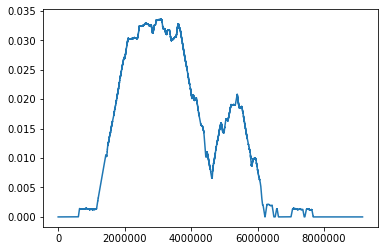

In [53]:
import matplotlib.pyplot as plt
plt.plot(corr)
# clock = np.arange(64, len(sig), 128)
# fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
# ax_orig.plot(sig)
# ax_orig.plot(clock, sig[clock], 'ro')
# ax_orig.set_title('Original signal')
# ax_noise.plot(sig_noise)
# ax_noise.set_title('Signal with noise')
# ax_corr.plot(corr)
# ax_corr.plot(clock, corr[clock], 'ro')
# ax_corr.axhline(0.5, ls=':')
# ax_corr.set_title('Cross-correlated with rectangular pulse')
# ax_orig.margins(0, 0.1)
# fig.tight_layout()
plt.show()

In [40]:
type(data2)

numpy.ndarray